# Processo Seletivo para Data Science SciCrop
### Matheus Sinto Novaes

​Apesar do agro gerar muito lucro, a vida dos agricultores não é fácil, mas sim um verdadeiro teste de resistência e determinação. Uma vez que tenhamos semeado as sementes, o agricultor precisa trabalhar dia e noite para garantir uma boa safra no final da estação. Uma boa colheita depende de diversos fatores, como disponibilidade de água, fertilidade do solo, proteção das culturas, uso oportuno de pesticidas, outros fatores químicos úteis e da natureza. <br>

​Muitos desses dados são quase impossíveis de se controlar, mas a quantidade e a frequência de pesticidas é algo que o agricultor pode administrar. Os pesticidas podem protegem a colheita com a dosagem certa. Mas, se adicionados em quantidade inadequada, podem prejudicar toda a safra.<br>

​Dito isto, abaixo são fornecidos dados baseados em culturas colhidas por vários agricultores no final da safra de 2018-2019. Para simplificar o problema, você pode assumir que todos os fatores relacionados as técnicas agrícolas e climáticas, não influenciaram esses resultados.<br>

​Seu objetivo neste exercício é determinar o resultado desta safra atual de 2020, ou seja, se a colheita será saudável, prejudicada por pesticidas, ou prejudicada por outros motivos.​ Apesar do agro gerar muito lucro, a vida dos agricultores não é fácil, mas sim um verdadeiro teste de resistência e determinação. Uma vez que tenhamos semeado as sementes, o agricultor precisa trabalhar dia e noite para garantir uma boa safra no final da estação. Uma boa colheita depende de diversos fatores, como disponibilidade de água, fertilidade do solo, proteção das culturas, uso oportuno de pesticidas, outros fatores químicos úteis e da natureza.<br>

​Muitos desses dados são quase impossíveis de se controlar, mas a quantidade e a frequência de pesticidas é algo que o agricultor pode administrar. Os pesticidas podem protegem a colheita com a dosagem certa. Mas, se adicionados em quantidade inadequada, podem prejudicar toda a safra.<br>

​Dito isto, abaixo são fornecidos dados baseados em culturas colhidas por vários agricultores no final da safra de 2018-2019. Para simplificar o problema, você pode assumir que todos os fatores relacionados as técnicas agrícolas e climáticas, não influenciaram esses resultados.<br>

​Seu objetivo neste exercício é determinar o resultado desta safra atual de 2020, ou seja, se a colheita será saudável, prejudicada por pesticidas, ou prejudicada por outros motivos.<br>

| Variável                 | Descrição                                                    |
| ------------------------ | ------------------------------------------------------------ |
| Identificador_Agricultor | IDENTIFICADOR DO CLIENTE                                     |
| Estimativa_de_Insetos    | Estimativa de insetos por M²                                 |
| Tipo_de_Cultivo          | Classificação do tipo de cultivo (0,1)                       |
| Tipo_de_Solo             | Classificação do tipo de solo (0,1)                          |
| Categoria_Pesticida      | Informação do uso de pesticidas (1- Nunca Usou, 2-Já Usou, 3-Esta usando) |
| Doses_Semana             | Número de doses por semana                                   |
| Semanas_Utilizando       | Número de semanas Utilizada                                  |
| Semanas_Sem_Uso          | Número de semanas sem utilizar                               |
| Temporada                | Temporada Climática (1,2,3)                                  |
| dano_na_plantacao        | Variável de Predição - Dano no Cultivo (0=Sem Danos, 1=Danos causados por outros motivos, 2=Danos gerados pelos pesticidas) |




In [1]:
import pandas as pd

#carregando as tabelas
safra_2018 = pd.read_csv('Safra_2018-2019.csv')
safra_2020 = pd.read_csv('Safra_2020.csv')

#os dados contém NaN, que deverão ser preechidos com 0
safra_2018 = safra_2018.fillna(0)
safra_2020 = safra_2020.fillna(0)

#visualizando a tabela de 2018-2019 para conhecer os dados
safra_2018.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [2]:
#visualizando a tabela de 2020 para conhecer os dados
safra_2020.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,0.0,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1


### Verificando os tipos de dados e suas quantidades em colunas categóricas

In [3]:
categ_pest = safra_2018['Categoria_Pesticida']
categ_pest.value_counts()

2    57067
3    22170
1      763
Name: Categoria_Pesticida, dtype: int64

Observa-se um desequilíbrio quanto à distribuição das categorias

In [4]:
temp = safra_2018['Temporada']
temp.value_counts()

2    39728
1    24233
3    16039
Name: Temporada, dtype: int64

O Label encoding já está aplicado, então não é necessário mudar a coluna. Porém a coluna a ser prevista é multiclass e precisa passar por um One-Hot Encoding

In [5]:
from sklearn.preprocessing import label_binarize
Y = safra_2018['dano_na_plantacao']
print(Y.value_counts())
Y = label_binarize(Y, classes= [0, 1, 2])

0    66716
1    11183
2     2101
Name: dano_na_plantacao, dtype: int64


### Separando os dados para treino e teste e escolhendo o modelo preditivo


In [6]:
#separando as features do treino
#todas podem ser usadas, exceto o identificador de cada agricultor
X = safra_2018.iloc[:, 2:10]
#separando as features para a predição
X_2020 = safra_2020.iloc[:, 2:]

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#separando os dados em treino e teste, para checar a precisão do classificador
#por padrão o treino terá 75% dos dados e o teste terá 25%, que são os valores mais adequados
x_train, x_test, y_train, y_test = train_test_split(X, Y) 

O modelo escolhido inicialmente é o RandomForestClassifier pois é um dos mais confiáveis, os parâmetros serão testados através do GridSearchCV

In [8]:
#paralelizando a random forest para rodar em mais de uma CPU
rfc = RandomForestClassifier(n_jobs = 8)
#como rodar várias RandomForest toma muito processamento, a busca dos melhores parâmetros foi feita procurando em pequenos intervalos e checando qual o que maximize a auc, o primeiro intervalo de n_estimators foi entre 100 e 110, o número foi baixando, já o Max_depth se estabilizou e 10
params = {'n_estimators': [80, 90], 'max_depth': [5, 10] }
#serão testados os parâmetros de quantas árvores devem ser geradas na floresta e qual suas profundidades máximas
#para medir o melhor é escolhido a área abaixo da curva característa de operação do receptor, ou seja, checando a taxa de falso positivos
#quão maior a área abaixo da curva, menor a taxa de falso positivos, portanto maior a precisão do modelo
gdcv = GridSearchCV(rfc, param_grid= params, scoring= 'roc_auc')
gdcv_res = gdcv.fit(x_train, y_train)
print('Melhor: {} com {}'.format(gdcv_res.best_score_, gdcv_res.best_params_))

Melhor: 0.7999215018797908 com {'max_depth': 10, 'n_estimators': 80}


In [9]:
score = gdcv.score(x_test, y_test)
score

0.8092108267404982

### Predizendo o Resultado

In [11]:
y_predict = pd.DataFrame(gdcv.predict(X_2020))

#pondo os resultados numa só coluna na tabela
y_predict[0] = [-1 if i == 1 else 0 for i in y_predict[0]]
y_predict[2] = [2 if i == 1 else 0 for i in y_predict[2]]
y_predict['dano'] = y_predict[0]+y_predict[1]+y_predict[2]
y_predict['dano'] = [0 if i == -1 else i for i in y_predict['dano']]

safra_2020['dano_na_plantacao'] = y_predict['dano']
safra_2020['dano_na_plantacao'].value_counts()

0    8779
1      75
2       4
Name: dano_na_plantacao, dtype: int64

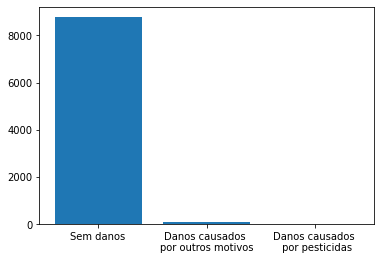

In [12]:
#demonstrando num gráfico de barras quantas plantações não serão prejudicadas, quantas terão danos causados por outros motivos e quantas por pesticidas
#%matplotlib notebook
import matplotlib.pyplot as plt
#contando quantas ocorrencias de cada um
bars = safra_2020['dano_na_plantacao'].value_counts()
#plotando o grafico por fim
plt.bar(bars.index, bars.values, tick_label = ['Sem danos', 'Danos causados \npor outros motivos', 'Danos causados \n por pesticidas']);
